# AVANCE II  PROYECTO INTEGRADOR

Grupo: 001, Lunes-Miércoles-Viernes/6:00pm-7:00pm¶
Equipo 7
- Josias de la Cruz Cruz               1750176
- Carlos Abraham Murillo Valdés        1488911
- Luisa Rubí Villegas Rincón           175257

Base de datos: Novel Corona Virus 2019 Dataset

### Descripción de la base de datos
La base de datos con la que se va a estar trabajando contiene información general a nivel mundial acerca del virus COVID-19.
Trabajaremos en esta base de datos con el objetivo de determinar distintas probabilidades que puede generar este virus.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [10]:
covid_2019 = pd.read_csv("covid_19_data.csv") 
covid_2019.shape # Nos muestra el tamaño de nuestra base de datos

(19286, 8)

In [11]:
covid_2019.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [12]:
new_covid_2019 = covid_2019.rename(columns={'Country/Region':'Country'})
new_covid_2019.head()

SNo ObservationDate Province/State         Country      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [13]:
new_covid_2019.Country.unique().shape

(220,)

In [14]:
new_covid_2019.Confirmed.sum()

64440602.0

In [15]:
(new_covid_2019['Country'].unique())

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

Enter Name of Country

In [16]:
name ='US'

In [17]:
df = new_covid_2019[new_covid_2019['Country'] ==  name]

In [18]:
df.head()

SNo ObservationDate Province/State Country      Last Update  Confirmed  \
31    32      01/22/2020     Washington      US  1/22/2020 17:00        1.0   
69    70      01/23/2020     Washington      US    1/23/20 17:00        1.0   
117  118      01/24/2020     Washington      US    1/24/20 17:00        1.0   
118  119      01/24/2020        Chicago      US    1/24/20 17:00        1.0   
158  159      01/25/2020     Washington      US    1/25/20 17:00        1.0   

     Deaths  Recovered  
31      0.0        0.0  
69      0.0        0.0  
117     0.0        0.0  
118     0.0        0.0  
158     0.0        0.0

In [19]:
df.describe().T

count         mean           std   min      25%     50%       75%  \
SNo        3714.0  9589.620355   5375.548211  32.0  4667.25  9292.0  14164.75   
Confirmed  3714.0  4707.642165  19723.745015   0.0     3.00   171.0   2046.00   
Deaths     3714.0   214.431879   1269.831879   0.0     0.00     3.0     52.00   
Recovered  3714.0   370.712439   5053.308023   0.0     0.00     0.0      0.00   

                max  
SNo         19282.0  
Confirmed  291996.0  
Deaths      22668.0  
Recovered  111424.0

Report of Data

In [20]:
from pandas_profiling import ProfileReport 
report = ProfileReport(df)
report

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Country on World Map

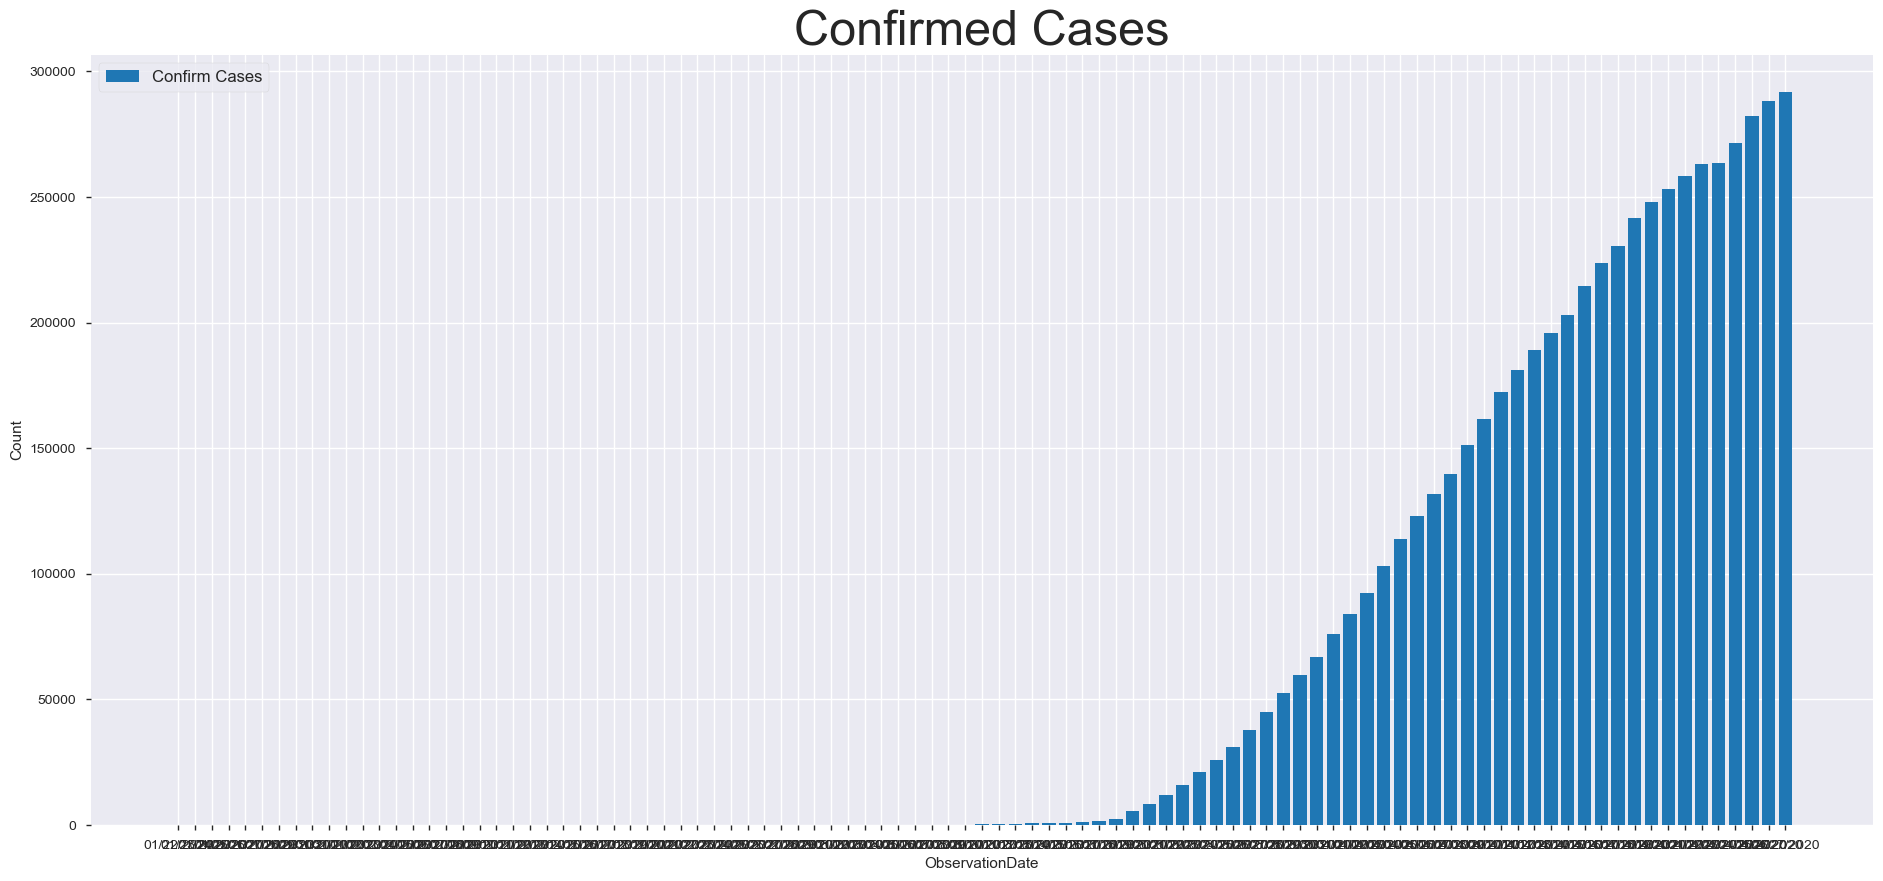

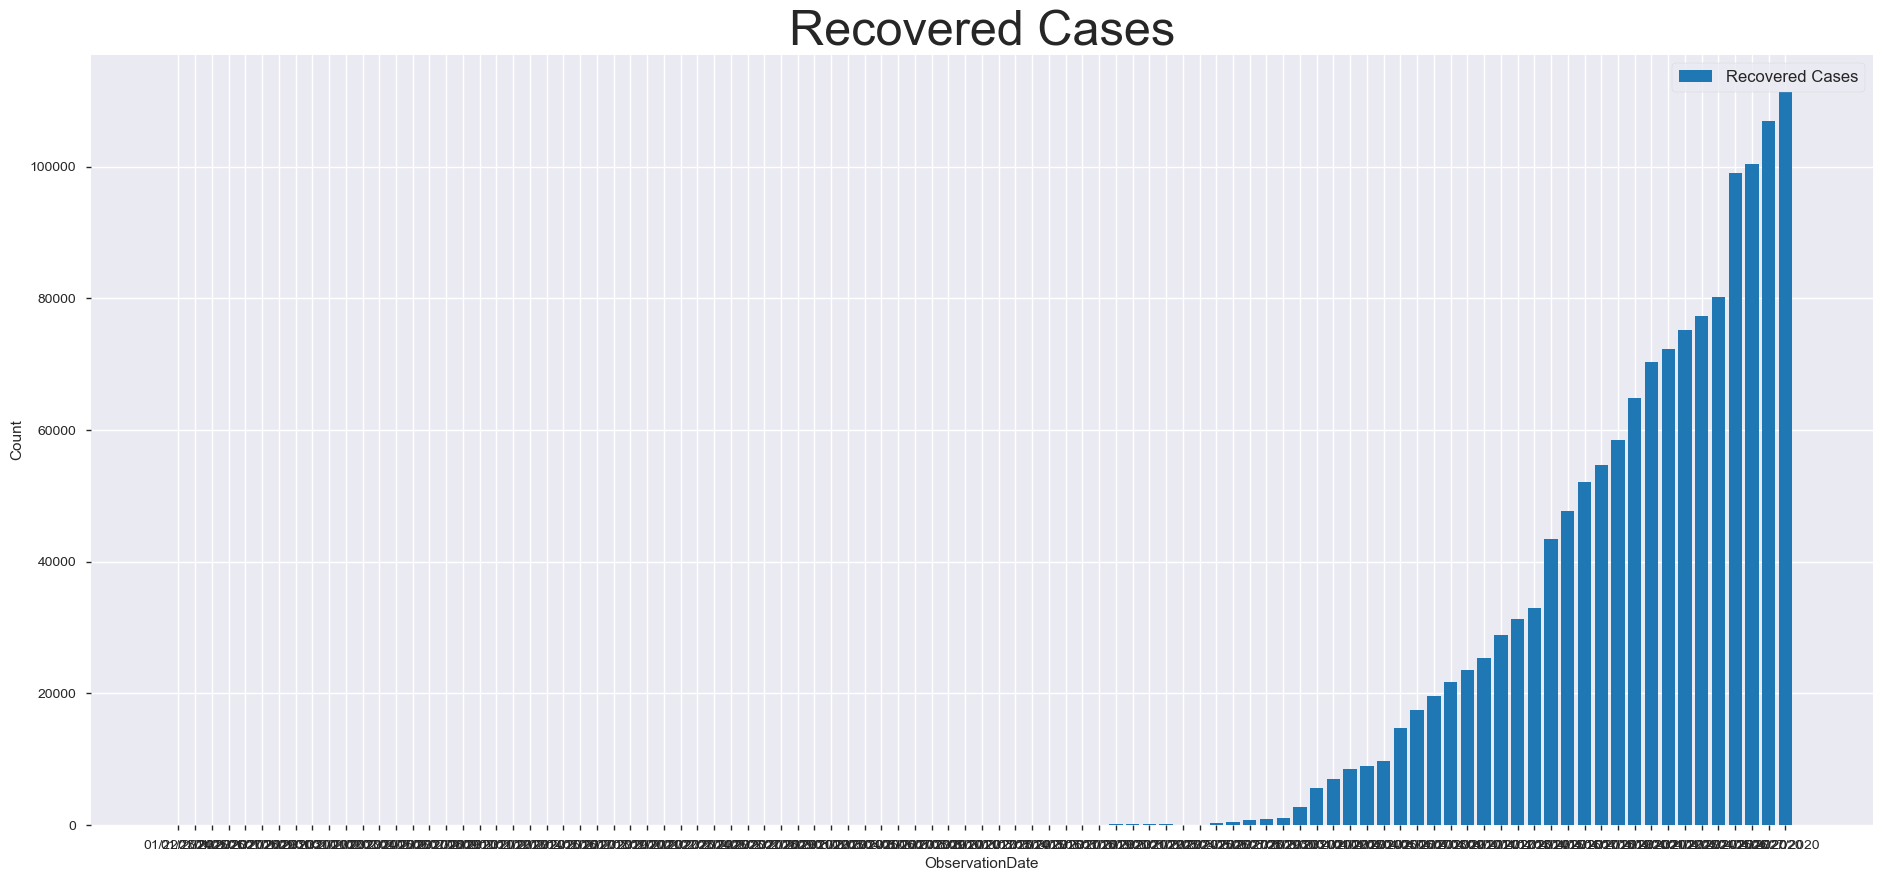

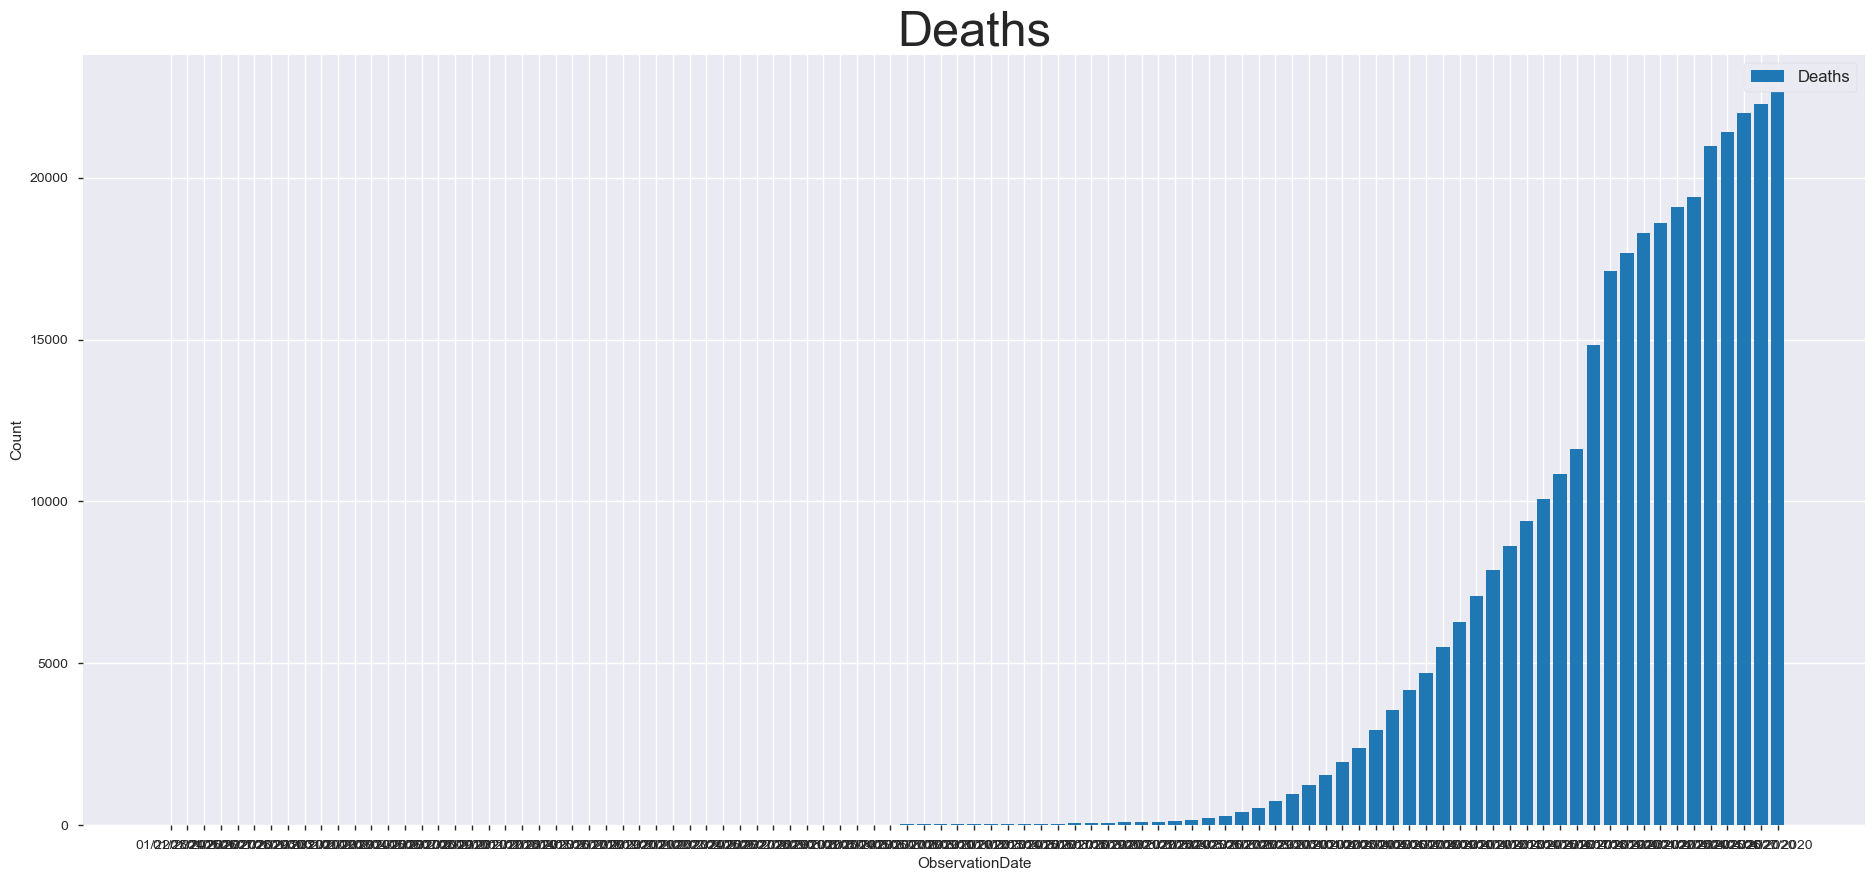

In [21]:
p = df
df= p.tail(14)
plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Confirmed,label="Confirm Cases")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Recovered,label="Recovered Cases")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Deaths,label="Deaths")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize = 35)
plt.show()

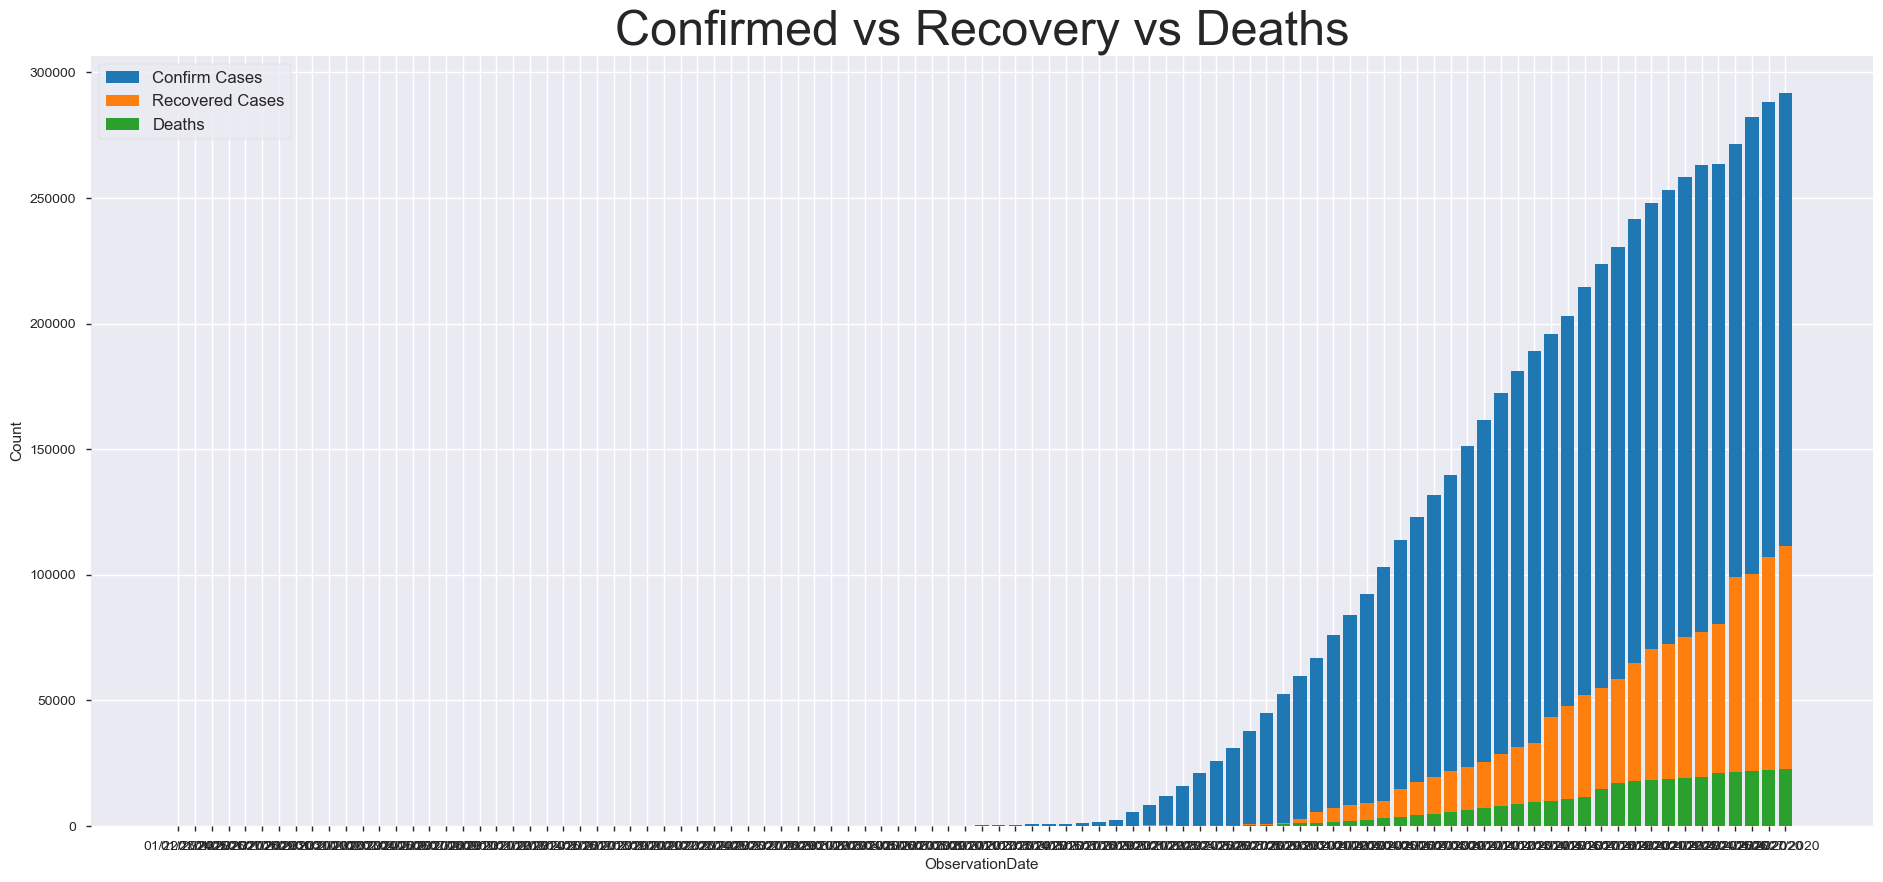

In [22]:
plt.figure(figsize=(23,10))
plt.bar(p.ObservationDate, p.Confirmed,label="Confirm Cases")
plt.bar(p.ObservationDate, p.Recovered,label="Recovered Cases")
plt.bar(p.ObservationDate, p.Deaths,label="Deaths")
plt.xlabel('ObservationDate')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed vs Recovery vs Deaths',fontsize = 35)
plt.show()

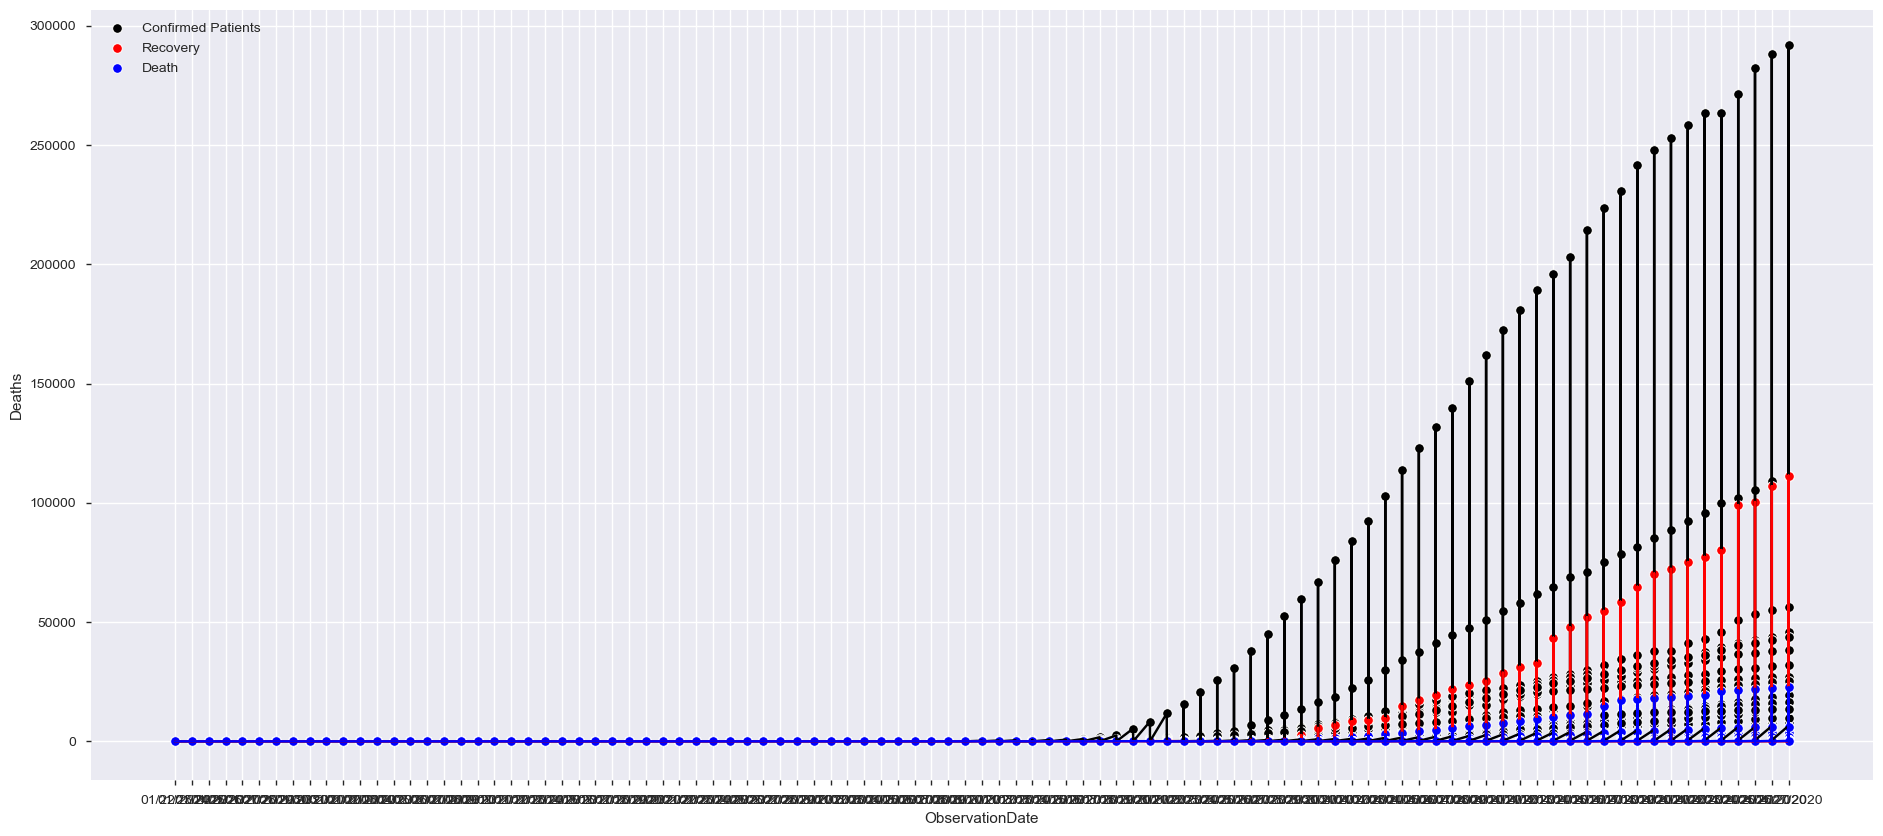

In [23]:
f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="ObservationDate", y="Confirmed", data=p,
             color="black",label = "Confirmed Patients")
ax=sns.scatterplot(x="ObservationDate", y="Recovered", data=p,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="ObservationDate", y="Deaths", data=p,
             color="blue",label = "Death")
plt.plot(p.ObservationDate,p.Confirmed,zorder=1,color="black")
plt.plot(p.ObservationDate,p.Recovered,zorder=1,color="red")
plt.plot(p.ObservationDate,p.Deaths,zorder=1,color="blue")

In [24]:
!pip install chart_studio

In [25]:
pip install bubbly

Note: you may need to restart the kernel to use updated packages.


In [26]:
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import chart_studio.plotly as py

figure = bubbleplot(dataset=p, x_column='Confirmed', y_column='Recovered', 
    bubble_column='ObservationDate',size_column='Recovered', color_column='ObservationDate', 
    x_title="Confirm", y_title="Recovered", title='Confirm vs Recovered',
     scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:159: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



In [27]:
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import chart_studio.plotly as py

figure = bubbleplot(dataset=p, x_column='Confirmed', y_column='Deaths', 
    bubble_column='ObservationDate',size_column='Deaths', color_column='ObservationDate', 
    x_title="Confirm", y_title="Deaths", title='Confirm vs Deaths',
     scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})

Growth Rate and Growth Factor

In [ ]:
global_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed

def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)

def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# This is a function which plots (for in input country) the active, confirmed, and recovered cases, deaths, and the growth factor.
def plot_country_active_confirmed_recovered(country):
    
    # Plots Active, Confirmed, and Recovered Cases. Also plots deaths.
    country_data = global_data[global_data['Country/Region']==country]
    table = country_data.drop(['SNo','Province/State', 'Last Update'], axis=1)
    table['ActiveCases'] = table['Confirmed'] - table['Recovered'] - table['Deaths']
    table2 = pd.pivot_table(table, values=['ActiveCases','Confirmed', 'Recovered','Deaths'], index=['ObservationDate'], aggfunc=np.sum)
    table3 = table2.drop(['Deaths'], axis=1)
   
    # Growth Factor
    w = 0.5
    table2['GrowthFactor'] = growth_factor(table2['Confirmed'])
    table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

    # 2nd Derivative
    table2['2nd_Derivative'] = np.gradient(np.gradient(table2['Confirmed'])) #2nd derivative
    table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


    #Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
    table2['GrowthRatio'] = growth_ratio(table2['Confirmed'])
    table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
    #Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
    table2['GrowthRate']=np.gradient(np.log(table2['Confirmed']))
    table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)
    
    # horizontal line at growth rate 1.0 for reference
    x_coordinates = [1, 100]
    y_coordinates = [1, 1]
    f, ax = plt.subplots(figsize=(15,5))
    table2['Deaths'].plot(title='Deaths')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthFactor'].plot(title='Growth Factor')
    plt.plot(x_coordinates, y_coordinates) 
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['2nd_Derivative'].plot(title='2nd_Derivative')
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRatio'].plot(title='Growth Ratio')
    plt.plot(x_coordinates, y_coordinates)
    plt.show()
    f, ax = plt.subplots(figsize=(15,5))
    table2['GrowthRate'].plot(title='Growth Rate')
    plt.show()

    return